##### OpenCV 行人偵測
這篇教學會介紹使用 OpenCV，搭配人體特徵模型，偵測影像中的行人，並透過繪製形狀的方式，使用方框標記偵測到的行人，實現類似 AI 影像辨識的效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 下載行人特徵模型 
OpenCV 的官方 Github 提供了許多訓練好的特徵模型，從下方網址下載人體特徵模型，下載後將 xml 檔案和 Python 的程式檔放在同一層目錄下。

[OpenCV 官方 Github](https://github.com/opencv/opencv/tree/4.x/data)\
[人體特徵模型](haarcascade_fullbody.xml)

##### 偵測影像中的行人 
下方的例子執行後，會偵測影像中的行人，並透過繪製形狀的方式，使用方框標記偵測到的行人，如果有發生偵測到不是行人的形狀，可以調整 scaleFactor 和 minNeighbors 參數再重新偵測。

* 參考：cvtcolor() 色彩轉換、rectangle() 畫四邊形、for 迴圈

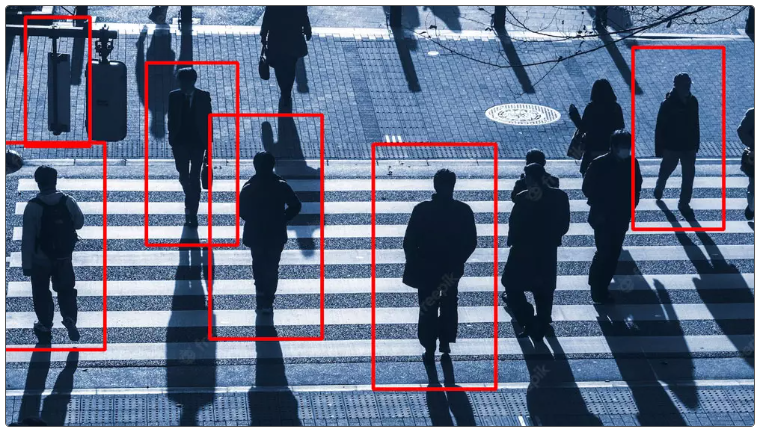

In [9]:
import cv2

# 讀取街道影像
img = cv2.imread(r'Img/people/2.jpg')                    

# 將影像轉換成灰階影像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    

# 讀取人體偵測模型
car = cv2.CascadeClassifier(r"Model/5/haarcascade_fullbody.xml")    

# 使用中值模糊去除雜訊，參數 5 表示模糊程度
gray = cv2.medianBlur(gray, 1)                  

# 偵測行人，參數 1.1 表示每次圖像尺寸減少的比例，3 表示每個目標至少要檢測到幾次才算是真的目標
cars = car.detectMultiScale(gray, 1.1, 1)       

# 繪製偵測到的行人外框
for (x, y, w, h) in cars:
    # 繪製矩形，參數 (x, y) 是矩形的左上角座標，(x+w, y+h) 是矩形的右下角座標，(0, 255, 0) 是矩形的顏色，2 是矩形的線條寬度
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)   

# 顯示影像
cv2.imshow('oxxostudio', img)

# 按下任意鍵停止
cv2.waitKey(0) 
cv2.destroyAllWindows()